# Imports

Needs to run xenicsEnv (Python 3.9.13)


In [ ]:
import numpy as np
import scipy.ndimage
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
%matplotlib inline

import XenicsCam as XCam
import Zaber
import TLX2
import XPOW
from XPOW import ATTEN_CHANNEL, ATTEN_MAXVOLTAGE

import PIC_lib as PIC

import os, sys, glob, re, time, importlib

In [20]:
tlx.laser_off()
tlx.close()

zaber.close

xpow.close()

cam.close()

Laser set to off.
Laser set to off.
Connection to TLX2 laser closed.
Sent XPOW command: "CH:1:VOLT:0" to port "COM4".
COM4answer = {:1:VOLT:0:OK}
Sent XPOW command: "CH:1:CUR:100" to port "COM4".
COM4answer = {1:CUR:100:OK}
Sent XPOW command: "CH:2:VOLT:0" to port "COM4".
COM4answer = {:2:VOLT:0:OK}
Sent XPOW command: "CH:2:CUR:100" to port "COM4".
COM4answer = {2:CUR:100:OK}
Sent XPOW command: "CH:3:VOLT:0" to port "COM4".
COM4answer = {:3:VOLT:0:OK}
Sent XPOW command: "CH:3:CUR:100" to port "COM4".
COM4answer = {3:CUR:100:OK}
Sent XPOW command: "CH:4:VOLT:0" to port "COM4".
COM4answer = {:4:VOLT:0:OK}
Sent XPOW command: "CH:4:CUR:100" to port "COM4".
COM4answer = {4:CUR:100:OK}
Sent XPOW command: "CH:5:VOLT:0" to port "COM4".
COM4answer = {:5:VOLT:0:OK}
Sent XPOW command: "CH:5:CUR:100" to port "COM4".
COM4answer = {5:CUR:100:OK}
Sent XPOW command: "CH:6:VOLT:0" to port "COM4".
COM4answer = {:6:VOLT:0:OK}
Sent XPOW command: "CH:6:CUR:100" to port "COM4".
COM4answer = {6:CUR:100:OK}
S

# Connect to devices

Find available Xeneth-compatible devices and open camera of interest

In [2]:
cam = XCam.XENICSCAM()

Device[0] XEVA-CL-FPA-2.5-320-TE4-60Hz @  (USB)
URL: cam://0
State: Available (0)

Checking camera temperature
CCD is cold! Now available to take images!
Exposure time was 2500.0 μs
Exposure time is now 350.0 μs


Turn on laser

In [3]:
tlx = TLX2.TLX()
tlx.laser_on()

Connected to TLX2 laser.
VOA set to 10.0 dB.
VOA set to 20.0 dB.
Laser set to on. VOA is 20.0.


Connect to Zaber actuators/stages
- Axis 0: camera x (horizontal) motion = `XCam.CAM_X`
- Axis 1: camera focus motion = `XCam.CAM_FOCUS`
- Axis 2: camera y (vertical) motion = `XCam.CAM_Y`. Has a tendency to slip/stall; first try motion as is, and if exception is raised, move at 0.1 mm/s

In [4]:
zaber = Zaber.ZABER()

Found 6 devices
Positions:
Device 0: 11.44981200000001 mm
Device 1: 17.92214475000002 mm
Device 2: 18.649902375000018 mm
Device 3: 0.015954375000000017 mm
Device 4: 14.226778125000013 mm
Device 5: 149.99998575000015 mm


Connect to XPOW breadboard

In [5]:
xpow = XPOW.XPOW()

------------------------------------------
Chosen XPOW Ports: ['COM4', 'COM6', 'COM8']
------------------------------------------

XPOW ports created!
Sent XPOW command: "board?" to all ports.
COM4 is not answered
COM6answer = {D:2:MIDDLE}
COM8answer = {D:3:BOTTOM}
Sent XPOW command: "CH:1:VOLT:0" to port "COM4".
COM4answer = {:1:VOLT:0:OK}
Sent XPOW command: "CH:1:CUR:100" to port "COM4".
COM4answer = {1:CUR:100:OK}
Sent XPOW command: "CH:2:VOLT:0" to port "COM4".
COM4answer = {:2:VOLT:0:OK}
Sent XPOW command: "CH:2:CUR:100" to port "COM4".
COM4answer = {2:CUR:100:OK}
Sent XPOW command: "CH:3:VOLT:0" to port "COM4".
COM4answer = {:3:VOLT:0:OK}
Sent XPOW command: "CH:3:CUR:100" to port "COM4".
COM4answer = {3:CUR:100:OK}
Sent XPOW command: "CH:4:VOLT:0" to port "COM4".
COM4answer = {:4:VOLT:0:OK}
Sent XPOW command: "CH:4:CUR:100" to port "COM4".
COM4answer = {4:CUR:100:OK}
Sent XPOW command: "CH:5:VOLT:0" to port "COM4".
COM4answer = {:5:VOLT:0:OK}
Sent XPOW command: "CH:5:CUR:100" to 

Take a test image

Laser set to on. VOA is 10.0.
Laser set to off.


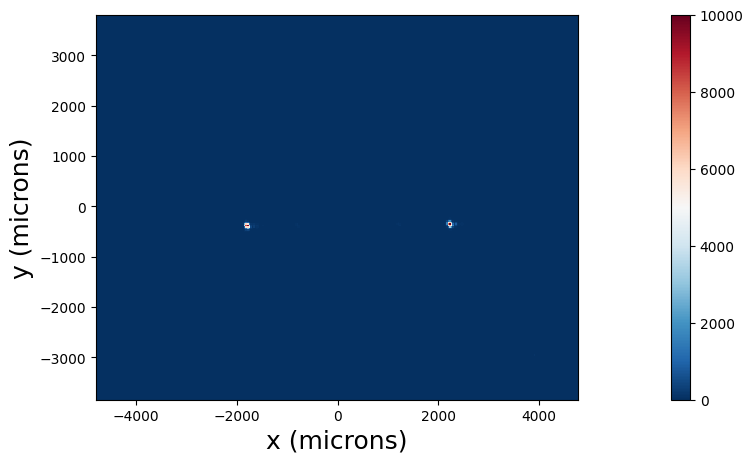

In [8]:
tlx.laser_on()
time.sleep(10)
x, y, data, _ = cam.take_image()

tlx.laser_off()
time.sleep(2)
x, y, dark, _ = cam.take_image()

fig, ax = plt.subplots(1, 1, figsize=(24,5))
norm = colors.Normalize(vmin=0, vmax=10000) 
im0 = ax.pcolormesh(x, y, data-dark, norm=norm, cmap='RdBu_r')
fig.colorbar(im0, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
for i in range(3):
    ax.set_aspect('equal')
plt.show()

# Find focus

Positions:
Device 0: 11.44981200000001 mm
Device 1: 17.915667750000015 mm
Device 2: 18.649902375000018 mm
Device 3: 0.015954375000000017 mm
Device 4: 14.226778125000013 mm
Device 5: 149.99998575000015 mm
Laser set to off.
Laser set to on. VOA is 20.0.


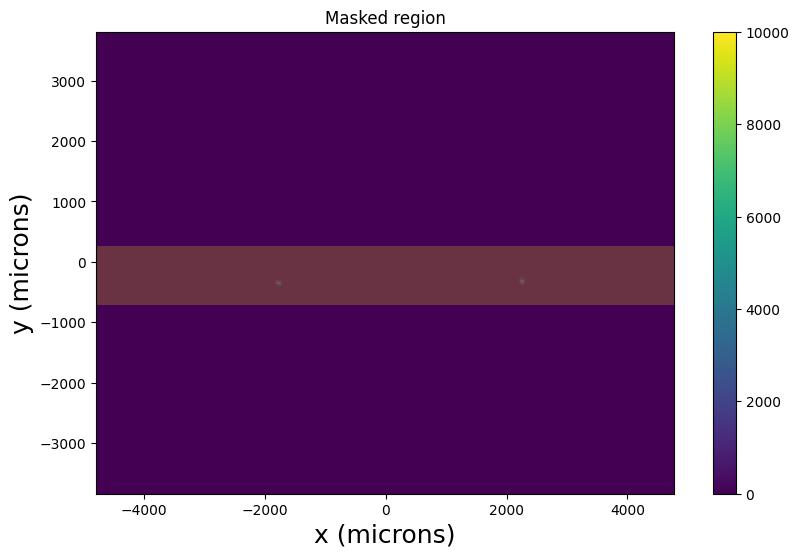

Starting metric: 5834.400000000001
Moving device 1...
Done moving device 1 from 17.915667750000015 mm to 17.93567025000002 mm.
Change in metric: -826.2000000000016


Moving device 1...
Done moving device 1 from 17.93567025000002 mm to 17.91966825000002 mm.
Change in metric: 542.2000000000016


Moving device 1...
Done moving device 1 from 17.91966825000002 mm to 17.903666250000015 mm.
Change in metric: -566.6000000000013


Moving device 1...
Done moving device 1 from 17.903666250000015 mm to 17.916429750000017 mm.
Change in metric: 127.80000000000109


Moving device 1...
Done moving device 1 from 17.916429750000017 mm to 17.929193250000015 mm.
Change in metric: 289.0


Moving device 1...
Done moving device 1 from 17.929193250000015 mm to 17.941956750000017 mm.
Change in metric: -727.2000000000016


Moving device 1...
Done moving device 1 from 17.941956750000017 mm to 17.931717375000016 mm.
Change in metric: 79.40000000000055


Moving device 1...
Done moving device 1 from 17.931717375000

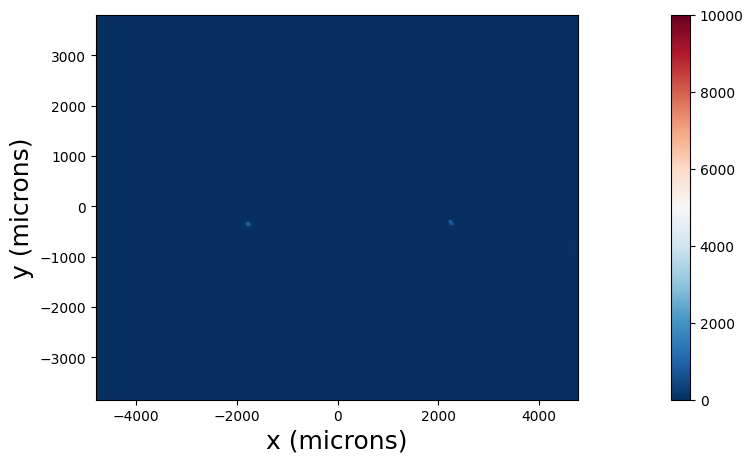

In [ ]:
zaber.get_positions(print_flag=True)

mask_region = [[-2500, 2500], [-500, 0]]
step = 0.02 # mm

zaber = PIC.find_focus(mask_region, step, tlx, zaber, cam, num_iter=20)

zaber.get_positions(print_flag=True)
x, y, data, _ = cam.take_image()

fig, ax = plt.subplots(1, 1, figsize=(24,5))
norm = colors.Normalize(vmin=0, vmax=10000) 
im0 = ax.pcolormesh(x, y, data-dark, norm=norm, cmap='RdBu_r')
fig.colorbar(im0, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
for i in range(3):
    ax.set_aspect('equal')
plt.show()

# Conduct voltage scan

Sent XPOW command: "CH:40:VOLT:4.5" to port "COM4".
COM4answer = {:40:VOLT:4.5:OK}
Sent XPOW command: "CH:40:VAL?" to port "COM4".
COM4answer = {40:4.503:0.0000}
Channel 40 set to 4.5 V.
Sent XPOW command: "CH:1:VOLT:5" to port "COM6".
COM6answer = {:1:VOLT:5:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:4.839:43.1816}
Channel 41 set to 5 V.
Sent XPOW command: "CH:19:VOLT:8" to port "COM4".
COM4answer = {:19:VOLT:8:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:7.711:73.1969}
Channel 19 set to 8 V.
Sent XPOW command: "CH:20:VOLT:8" to port "COM4".
COM4answer = {:20:VOLT:8:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:7.713:73.0902}
Channel 20 set to 8 V.
VOA set to 20.0 dB.
Laser set to on. VOA is 20.0.
Laser set to off.


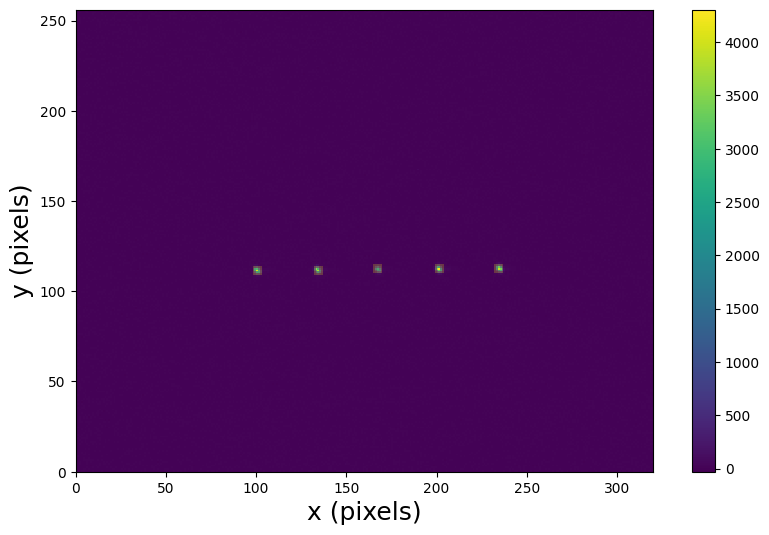

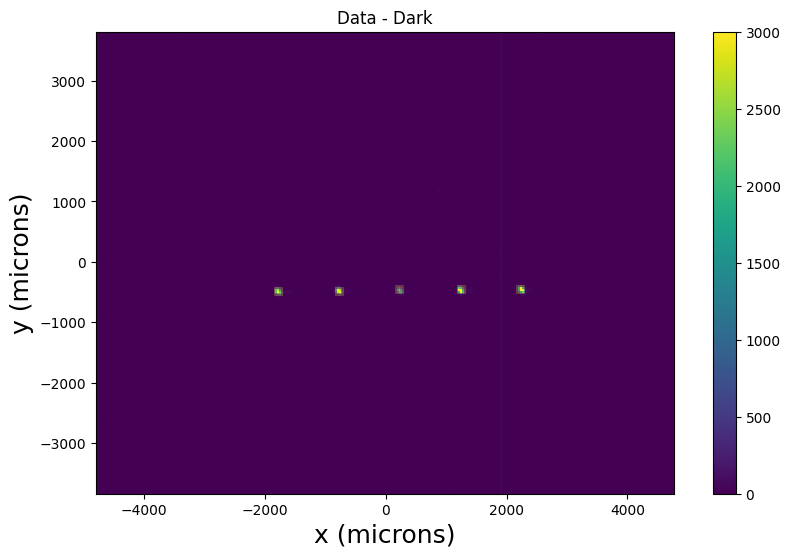

In [13]:
# Set XPOW voltages for reference image
xpow.apply_voltage(ATTEN_CHANNEL, 4.5)
xpow.apply_voltage(41, 5)
xpow.apply_voltage(19, 8)
xpow.apply_voltage(20, 8)

# Take reference data
tlx.set_voa(20)
tlx.laser_on()
time.sleep(10)
x, y, data, _ = cam.take_image()

# Take reference dark
tlx.laser_off()
time.sleep(2)
x, y, dark, _ = cam.take_image()
y_dim, x_dim = len(y), len(x)

outputs_masks = PIC.build_output_mask(data-dark, 5)

data, dark = PIC.remove_stripes(data, outputs_masks=outputs_masks), PIC.remove_stripes(dark)
data_reduce = data - dark

# Plot the reference data with the output mask
yellow_cmap = ListedColormap(['yellow'])
vmax = 3000

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=vmax)  

cbar_norm = colors.Normalize(vmin=0, vmax=vmax)
im = ax.pcolormesh(x, y, data_reduce, norm=cbar_norm, zorder=0)
for mask in outputs_masks:
    masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
ax.set_aspect('equal')
plt.show()

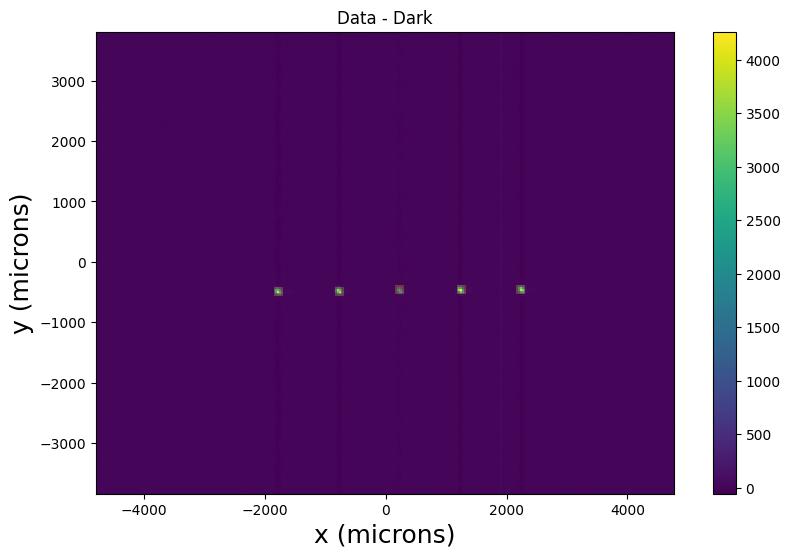

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=vmax)  

cbar_norm = colors.Normalize(vmin=0, vmax=vmax)
im = ax.pcolormesh(x, y, data_reduce, zorder=0)
for mask in outputs_masks:
    masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
    ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
ax.set_aspect('equal')
plt.show()

In [17]:
outputs_masks = np.array(outputs_masks)

In [19]:
filename_root = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-12-12-Calibration\\test_scan\\Device6a_I18_1x5Tricoupler'
channels = [20, 19, 41]
voltages = [np.arange(9, 12.1, 1), np.arange(9, 12.1, 1), np.arange(0, 2.1, 1)]

tlx.laser_on()
tlx.set_voa(20)
dats = PIC.voltage_scan(channels, 2, voltages, outputs_masks, filename_root, cam, xpow, tlx, dark_frame=dark)
np.savetxt(filename_root+"_dark.csv", dark, delimiter=",")

tlx.laser_off()


Laser set to on. VOA is 20.0.
VOA set to 20.0 dB.
Sent XPOW command: "CH:20:VOLT:9.0" to port "COM4".
COM4answer = {:20:VOLT:9.0:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:8.676:82.0142}
Channel 20 set to 9.0 V.
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:8.676:82.0142}
Sent XPOW command: "CH:19:VOLT:9.0" to port "COM4".
COM4answer = {:19:VOLT:9.0:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:8.675:82.1307}
Channel 19 set to 9.0 V.
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:8.675:82.1307}
Sent XPOW command: "CH:1:VOLT:0.0" to port "COM6".
COM6answer = {:1:VOLT:0.0:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:0.216:-0.3200}
Channel 41 set to 0.0 V.
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:0.218:-0.3200}
VOA set to 20.0 dB.
C:\Users\Pradip\Desktop\Sanny-PIC\2025-12-12-Calibration\test_scan\Device6a_I18_1x5Tricoupler_Ch20_V9p00_Ch19_V9p00_Ch41_V0p00_brigh

In [44]:
importlib.reload(PIC)

<module 'PIC_lib' from 'd:\\Yoojung\\PIC_lib.py'>

In [ ]:
initial_voltages = np.array([9.5, 9.5, 0.5])
channels = [20, 19, 41]
outputs_masks = np.copy(masks)
ind_null = 2
res = PIC.optimize_null(initial_voltages, channels, outputs_masks, ind_null, cam, xpow, dark_frame=dark)

Sent XPOW command: "CH:20:VOLT:9.54" to port "COM4".
COM4answer = {:20:VOLT:9.54:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:9.198:86.2543}
Channel 20 set to 9.544785867832749 V.
Sent XPOW command: "CH:19:VOLT:9.84" to port "COM4".
COM4answer = {:19:VOLT:9.84:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:9.459:88.8060}
Channel 19 set to 9.839164981322144 V.
Sent XPOW command: "CH:1:VOLT:0.67" to port "COM6".
COM6answer = {:1:VOLT:0.67:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:0.661:3.8132}
Channel 41 set to 0.6697784616271293 V.
voltages: [9.54478587 9.83916498 0.66977846]
intensities: 14455.600000000002 1130.000000000001 14946.2


Sent XPOW command: "CH:20:VOLT:9.58" to port "COM4".
COM4answer = {:20:VOLT:9.58:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:9.208:86.3332}
Channel 20 set to 9.577170783947714 V.
Sent XPOW command: "CH:19:VOLT:9.6" to port "COM4".
COM4answer = {:19:VOLT:9.6:OK}


KeyboardInterrupt: 

In [ ]:
res.x

array([9.88613562, 8.92641293, 1.30974278])

In [ ]:
B_intensity = 39355.2
null_intensity = 464.4
D_intensity = 52467.6

print('Null:', 10*np.log10(null_intensity/(B_intensity + null_intensity + D_intensity)))

Null: -22.982492585958006


Sent XPOW command: "CH:20:VOLT:9.89" to port "COM4".
COM4answer = {:20:VOLT:9.89:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:9.538:89.1928}
Channel 20 set to 9.886135624831248 V.
Sent XPOW command: "CH:19:VOLT:8.93" to port "COM4".
COM4answer = {:19:VOLT:8.93:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:8.609:81.3076}
Channel 19 set to 8.926412931329033 V.
Sent XPOW command: "CH:1:VOLT:1.31" to port "COM6".
COM6answer = {:1:VOLT:1.31:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:1.266:9.5915}
Channel 41 set to 1.3097427758587925 V.
Laser set to on. VOA is 8.0.
Laser set to off.


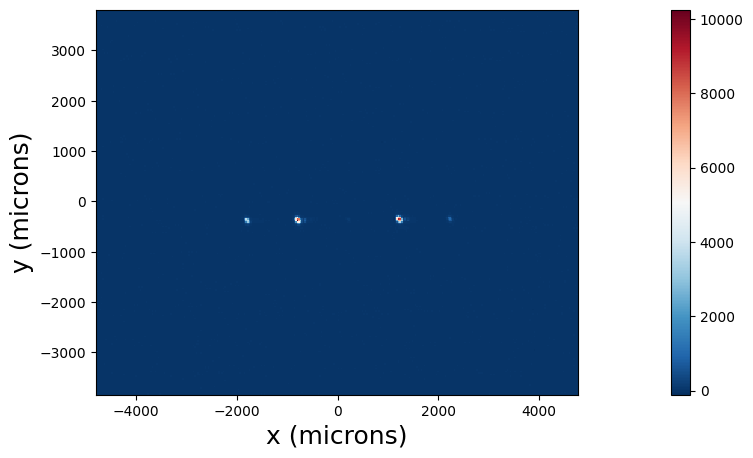

B data (mean, median, std. dev.): 9528.6 4806.584 4088.4 1530.299983056917
B data (mean, median, std. dev.): 4174.4 3965.008 3967.8 114.6038390979988
Null data (mean, median, std. dev.): 4258.2 3946.272 3950.8 169.30728400160456
Null dark (mean, median, std. dev.): 4208.8 3934.208 3916.8 172.36929174304805


In [ ]:
for i, channel in enumerate(channels):
    xpow.apply_voltage(channel, res.x[i])
time.sleep(1)

tlx.laser_on()
time.sleep(10)
x, y, data, _ = cam.take_image()

tlx.laser_off()
time.sleep(2)
x, y, dark, _ = cam.take_image()
y_dim, x_dim = len(y), len(x)

fig, ax = plt.subplots(1, 1, figsize=(24,5))
# norm = colors.Normalize(vmin=0, vmax=10000) 
im0 = ax.pcolormesh(x, y, data-dark, cmap='RdBu_r')
fig.colorbar(im0, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
for i in range(3):
    ax.set_aspect('equal')
plt.show()

print('B data (mean, median, std. dev.):', np.max(data[outputs_masks[1]]), np.mean(data[outputs_masks[1]]), np.median(data[outputs_masks[1]]), np.std(data[outputs_masks[1]]))
print('B data (mean, median, std. dev.):', np.max(dark[outputs_masks[1]]), np.mean(dark[outputs_masks[1]]), np.median(dark[outputs_masks[1]]), np.std(dark[outputs_masks[1]]))
print('Null data (mean, median, std. dev.):', np.max(data[outputs_masks[ind_null]]), np.mean(data[outputs_masks[ind_null]]), np.median(data[outputs_masks[ind_null]]), np.std(data[outputs_masks[ind_null]]))
print('Null dark (mean, median, std. dev.):', np.max(dark[outputs_masks[ind_null]]), np.mean(dark[outputs_masks[ind_null]]), np.median(dark[outputs_masks[ind_null]]), np.std(dark[outputs_masks[ind_null]]))

In [ ]:
importlib.reload(PIC)

<module 'PIC_lib' from 'd:\\Yoojung\\PIC_lib.py'>

In [ ]:
xpow.apply_voltage(41, 5)
xpow.apply_voltage(19, 8)
xpow.apply_voltage(20, 8)

Sent XPOW command: "CH:1:VOLT:5" to port "COM6".
COM6answer = {:1:VOLT:5:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:2.985:25.0570}
Channel 41 set to 5 V.
Sent XPOW command: "CH:19:VOLT:8" to port "COM4".
COM4answer = {:19:VOLT:8:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:8.680:81.6589}
Channel 19 set to 8 V.
Sent XPOW command: "CH:20:VOLT:8" to port "COM4".
COM4answer = {:20:VOLT:8:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:8.198:77.3303}
Channel 20 set to 8 V.


In [170]:
tlx.laser_status()

'on'

VOA set to 20.0 dB.


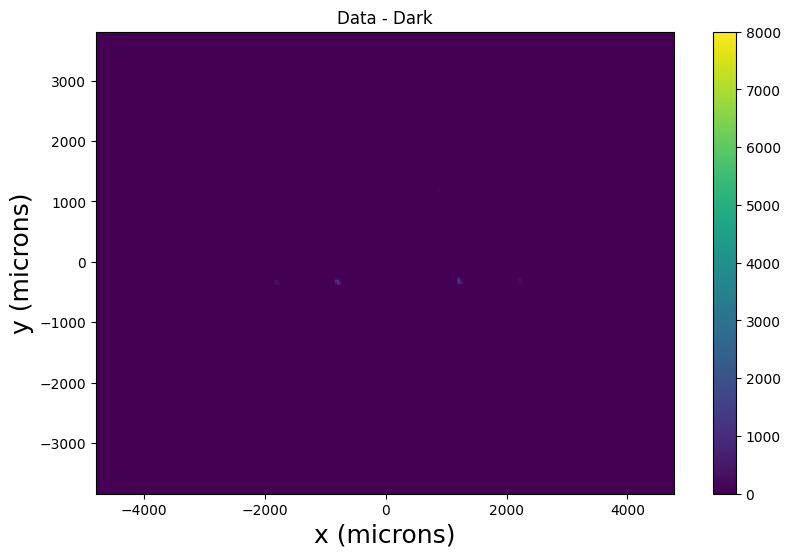

VOA set to 0.9 dB.


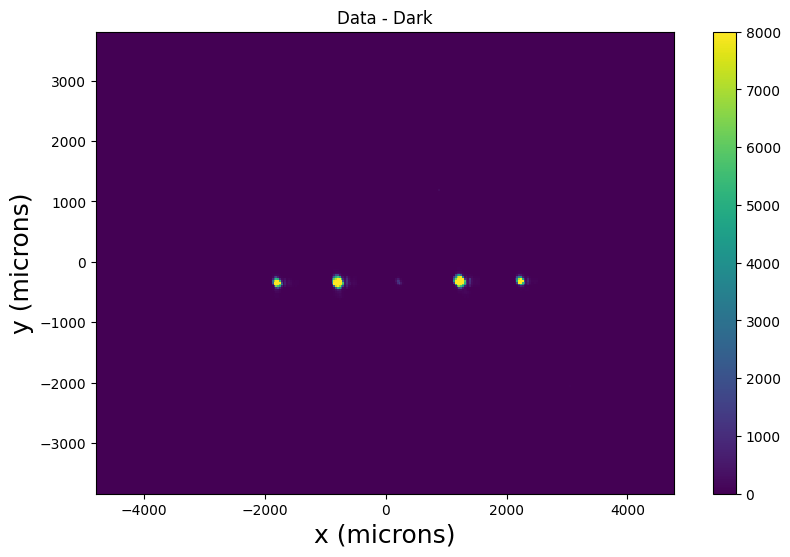

In [174]:
# tlx.laser_off()
# # time.sleep(10)
# x, y, dark, _ = cam.take_image()

# tlx.laser_on()
# time.sleep(5)
t_sleep =0

tlx.set_voa(20)
time.sleep(t_sleep)
x, y, data, _ = cam.take_image()

fig, ax = plt.subplots(1, 1, figsize=(10,6))
vmax=8000 

data_reduce = data - dark
cbar_norm = colors.Normalize(vmin=0, vmax=vmax)
im = ax.pcolormesh(x, y, data - dark, norm=cbar_norm, zorder=0)
# for mask in masks:
#     masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
#     ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
# ax.set_xlim(-2000, 1200)
# ax.set_ylim(0, 1200)
ax.set_aspect('equal')
plt.show()

tlx.set_voa(0.9)
time.sleep(t_sleep)
x, y, data, _ = cam.take_image()

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=vmax)  
im = ax.pcolormesh(x, y, data - dark, norm=cbar_norm, zorder=0)
# for mask in masks:
#     masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
#     ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_title('Data - Dark')
# ax.set_xlim(-2000, 1200)
# ax.set_ylim(0, 1200)
ax.set_aspect('equal')
plt.show()



# fig, ax = plt.subplots(1, 1, figsize=(24,5))
# # norm = colors.Normalize(vmin=0, vmax=10000) 
# im0 = ax.pcolormesh(x, y, dark, cmap='RdBu_r')
# fig.colorbar(im0, ax=ax, fraction=0.05*len(y)/len(x))
# ax.set_xlabel('x (microns)', fontsize=18)
# ax.set_ylabel('y (microns)', fontsize=18)
# for i in range(3):
#     ax.set_aspect('equal')
# plt.show()

data_reduce = data - dark

# # Determine coordinates of outputs
# filtered = scipy.ndimage.maximum_filter(data_reduce, size=5)
# mask = (data_reduce == filtered)
# coords = np.column_stack(np.nonzero(mask))
# coords = coords[np.argsort(data_reduce[coords[:,0], coords[:,1]])][-5:]
# coords = coords[np.argsort(coords[:, 1])]

# # Make 2D masks of the outputs
# masks = []
# select = 2
# for coord in coords:
#     mask = np.zeros_like(data, dtype=bool)
#     mask[coord[0]-select:coord[0]+select+1, coord[1]-select:coord[1]+select+1] = True 
#     masks.append(mask)

# Plot the reference data with the output mask
# from matplotlib.colors import ListedColormap
# yellow_cmap = ListedColormap(['yellow'])
# vmax = 3000

# fig, ax = plt.subplots(1, 1, figsize=(10,6))
# cbar_norm = colors.Normalize(vmin=0, vmax=vmax)  

# data_reduce = data - dark
# cbar_norm = colors.Normalize(vmin=0, vmax=vmax)
# im = ax.pcolormesh(x, y, data_reduce, zorder=0)
# for mask in masks:
#     masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
#     ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
# fig.colorbar(im, ax=ax, fraction=0.05*len(y)/len(x))
# ax.set_xlabel('x (microns)', fontsize=18)
# ax.set_ylabel('y (microns)', fontsize=18)
# ax.set_title('Data - Dark')
# # ax.set_xlim(-2000, 1200)
# # ax.set_ylim(0, 1200)
# ax.set_aspect('equal')
# plt.show()

In [ ]:
# print('B data (mean, median, std. dev.):', np.max(data[outputs_masks[1]]), np.mean(data[outputs_masks[1]]), np.median(data[outputs_masks[1]]), np.std(data[outputs_masks[1]]))
print('B data (mean, median, std. dev.):', np.max(dark[outputs_masks[1]]), np.mean(dark[outputs_masks[1]]), np.median(dark[outputs_masks[1]]), np.std(dark[outputs_masks[1]]))
# print('Null data (mean, median, std. dev.):', np.max(data[outputs_masks[ind_null]]), np.mean(data[outputs_masks[ind_null]]), np.median(data[outputs_masks[ind_null]]), np.std(data[outputs_masks[ind_null]]))
print('Null dark (mean, median, std. dev.):', np.max(dark[outputs_masks[2]]), np.mean(dark[outputs_masks[2]]), np.median(dark[outputs_masks[2]]), np.std(dark[outputs_masks[2]]))

B data (mean, median, std. dev.): 4162.6 3925.68 3948.2 139.53630638654587
Null dark (mean, median, std. dev.): 4216.0 3915.512 3912.8 175.45115404579127


In [175]:
tlx.laser_on()
tlx.set_voa(20)

Laser set to on. VOA is 0.9.
VOA set to 20.0 dB.


In [164]:
importlib.reload(PIC)

<module 'PIC_lib' from 'd:\\Yoojung\\PIC_lib.py'>

In [176]:
initial_voltages = np.array([9.5, 9.5, 0.3])
channels = [20, 19, 41]
outputs_masks = np.copy(masks)
ind_null = 2
res_voa, null_depth, all_voltages, null_metrics = PIC.optimize_null_twoAtten(initial_voltages, channels, outputs_masks, ind_null, cam, xpow, tlx, dark_frame=dark)

Sent XPOW command: "CH:20:VOLT:9.52" to port "COM4".
COM4answer = {:20:VOLT:9.52:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:9.089:85.4654}
Channel 20 set to 9.522392933916375 V.
Sent XPOW command: "CH:19:VOLT:9.67" to port "COM4".
COM4answer = {:19:VOLT:9.67:OK}
Sent XPOW command: "CH:19:VAL?" to port "COM4".
COM4answer = {19:9.217:86.7482}
Channel 19 set to 9.669582490661071 V.
Sent XPOW command: "CH:1:VOLT:0.38" to port "COM6".
COM6answer = {:1:VOLT:0.38:OK}
Sent XPOW command: "CH:1:VAL?" to port "COM6".
COM6answer = {1:0.261:0.0000}
Channel 41 set to 0.38488923081356463 V.
VOA set to 20.0 dB.
VOA set to 1.0 dB.
voltages: [9.52239293 9.66958249 0.38488923]
intensities: 6832.0 443.82408252473937 7697.6
null: 0.030546201032701475


Sent XPOW command: "CH:20:VOLT:9.54" to port "COM4".
COM4answer = {:20:VOLT:9.54:OK}
Sent XPOW command: "CH:20:VAL?" to port "COM4".
COM4answer = {20:9.188:86.2346}
Channel 20 set to 9.538585391973857 V.
Sent XPOW command: "CH:19:VO

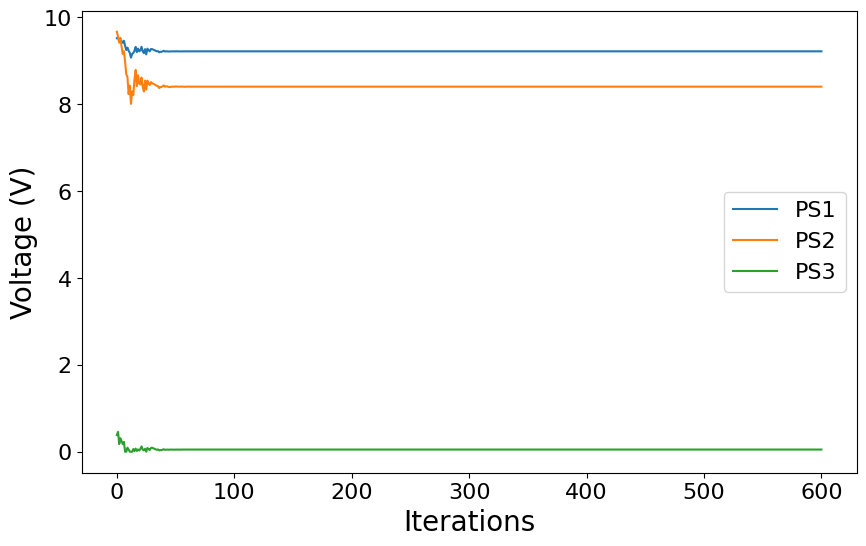

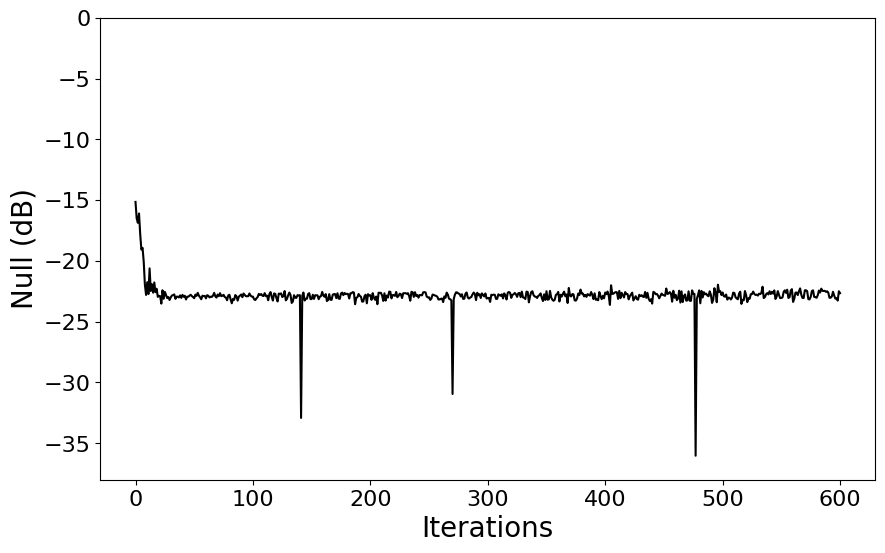

In [197]:
all_voltages = np.array(all_voltages)
null_metrics = np.array(null_metrics)

plt.figure(figsize=(10,6))
plt.plot(all_voltages[:,0], label='PS1')
plt.plot(all_voltages[:,1], label='PS2')
plt.plot(all_voltages[:,2], label='PS3')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Voltage (V)', fontsize=20)
plt.legend(fontsize=16)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(10*np.log10(null_metrics), 'k')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('Null (dB)', fontsize=20)
plt.ylim(-38, 0)
plt.show()

# Close all connections to hardware

In [ ]:
cam.close()

tlx.laser_off()
tlx.close()

zaber.close()

xpow.close()

Stopped streaming frames!
Camera closed!
Laser set to off.
Laser set to off.
Connection to TLX2 laser closed.
Connection to Zabers closed.


# Miscellaneous

In [ ]:
positions_0, positions_1, positions_2 = np.arange(0, 25.4, 4), np.arange(0, 25.4, 0.5), np.arange(14., 23., 4.)
intensities = []
for position_1 in positions_1:
    zaber.move_absolute(1, position_1)
    intensities_focus = []
    for position_2 in positions_2:
        try:
            zaber.move_absolute(2, position_2)
        except:
            zaber.move_absolute(2, position_2, velocity=0.1)
        intensities_row = []
        for position_0 in positions_0:
            zaber.move_absolute(0, position_0)
            time.sleep(0.5)
            x, y, data = cam.take_image()
            intensities_row.append(np.sum(data-dark))
            print(np.sum(data-dark))
        intensities_focus.append(intensities_row)
    intensities.append(intensities_focus)

Moving device 1...
Done moving device 1 from 0.0 mm to 0.0 mm.
Moving device 2...
Moving device 2...
Done moving device 2 from 13.363289250000012 mm to 13.999987875000013 mm.
Moving device 0...


In [ ]:
tlx.laser_on()

Laser set to on.


Moving device 0...
Done moving device 0 from 12.000023625000011 mm to 12.000023625000011 mm.
Moving device 2...
Moving device 2...
Done moving device 2 from 17.352883125000016 mm to 18.000011625000017 mm.
Moving device 1...
Done moving device 1 from 24.999981750000025 mm to 0.0 mm.
Moving device 1...
Done moving device 1 from 0.0 mm to 0.5000148750000004 mm.
Moving device 1...
Done moving device 1 from 0.5000148750000004 mm to 0.9999821250000009 mm.
Moving device 1...
Done moving device 1 from 0.9999821250000009 mm to 1.4999970000000014 mm.
Moving device 1...
Done moving device 1 from 1.4999970000000014 mm to 2.000011875000002 mm.
Moving device 1...
Done moving device 1 from 2.000011875000002 mm to 2.4999791250000025 mm.
Moving device 1...
Done moving device 1 from 2.4999791250000025 mm to 2.9999940000000027 mm.
Moving device 1...
Done moving device 1 from 2.9999940000000027 mm to 3.5000088750000033 mm.
Moving device 1...
Done moving device 1 from 3.5000088750000033 mm to 4.00002375000

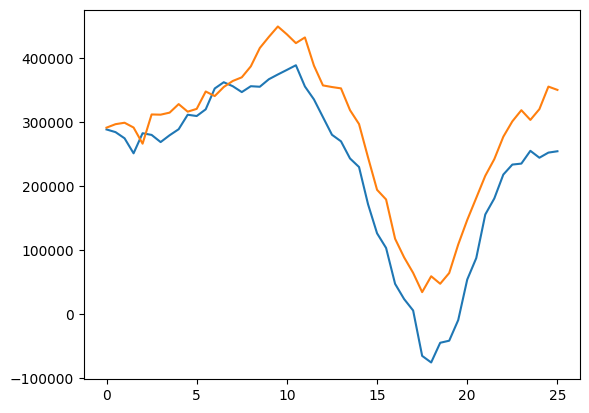

In [ ]:
position_0, position_2 = 12., 18
zaber.move_absolute(0, position_0)
try:
    zaber.move_absolute(2, position_2)
except:
    zaber.move_absolute(2, position_2, velocity=0.1)

positions_0, positions_1, positions_2 = np.arange(0, 25.4, 4), np.arange(0, 25.4, 0.5), np.arange(14., 23., 4.)
intensities_2 = []
for position_1 in positions_1:
    zaber.move_absolute(1, position_1)     
    time.sleep(0.5)
    x, y, data = cam.take_image()
    intensities_2.append(np.sum(data-dark))

plt.figure()
plt.plot(positions_1, intensities)
plt.plot(positions_1, intensities_2)
plt.show()

Moving device 1...
Done moving device 1 from 18.000011625000017 mm to 8.999982000000008 mm.


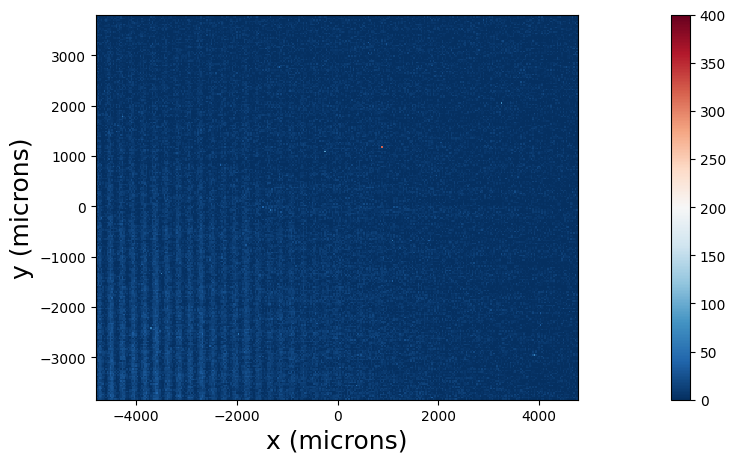

In [ ]:
zaber.move_absolute(1, 9)
x, y, data = cam.take_image()

fig, ax = plt.subplots(1, 1, figsize=(24,5))
norm = colors.Normalize(vmin=0, vmax=400) 
im0 = ax.pcolormesh(x, y, data-dark, norm=norm, cmap='RdBu_r')
fig.colorbar(im0, ax=ax, fraction=0.05*len(y)/len(x))
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
for i in range(3):
    ax.set_aspect('equal')
plt.show()

Stopped streaming frames!
Camera closed!
Connection to Zabers closed.


In [ ]:
data = XAQ.TakeImage(cam, navg)

y_dim, x_dim = np.shape(data)
x = np.linspace(-x_dim/2 * 30, (x_dim/2 - 1) * 30, x_dim)
y = np.linspace(-y_dim/2 * 30,(y_dim/2 - 1) * 30, y_dim)

fig, ax = plt.subplots(1, 1, figsize=(24,5))
norm = colors.Normalize(vmin=0, vmax=np.max(data[abs(y-700)<300][:,abs(x+400)<1150])) 
norm = colors.Normalize(vmin=0, vmax=10000) 
im0 = ax.pcolormesh(x, y, data, norm=norm)
fig.colorbar(im0, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
for i in range(3):
    ax.set_aspect('equal')
# plt.xlim(-1500,800)
# plt.ylim(400, 1000)
plt.show()

Automate focus finding

In [ ]:
zaber = Zaber.ZABER()

In [ ]:
zaber.move_absolute(device_ind, 22)
zaber.get_positions(print_flag=True)

In [ ]:
data = XAQ.TakeImage(cam, navg)

mask = np.zeros_like(data, dtype=bool)
ix = np.abs(x + 350) < 1600   # x-condition
iy = np.abs(y + 150) < 300   # y-condition
mask[iy[:, None] & ix[None, :]] = True

yellow_cmap = ListedColormap(['yellow'])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=10000)  
ax.pcolormesh(x, y, data, norm=cbar_norm, zorder=0)
# masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
# ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im0, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_aspect('equal')
plt.show()

metric = np.sum(data[mask])
print(metric)

In [ ]:
import scipy.ndimage
from matplotlib.colors import ListedColormap

data = XAQ.TakeImage(cam, navg)

mask = np.zeros_like(data, dtype=bool)
ix = np.abs(x + 350) < 1600   # x-condition
iy = np.abs(y + 150) < 300   # y-condition
mask[iy[:, None] & ix[None, :]] = True

yellow_cmap = ListedColormap(['yellow'])

fig, ax = plt.subplots(1, 1, figsize=(10,6))
cbar_norm = colors.Normalize(vmin=0, vmax=10000)  
ax.pcolormesh(x, y, data, norm=cbar_norm, zorder=0)
masked_overlay = np.ma.masked_where(~mask, np.ones_like(mask))
ax.pcolormesh(x, y, masked_overlay, cmap=yellow_cmap, alpha=0.2, zorder=1)
# ax.plot(x[coords[:, 1]], y[coords[:, 0]], 'r+')
fig.colorbar(im0, ax=ax, fraction=0.05*y_dim/x_dim)
ax.set_xlabel('x (microns)', fontsize=18)
ax.set_ylabel('y (microns)', fontsize=18)
ax.set_aspect('equal')
plt.show()

metric = np.sum(data[mask])
metric_prior = np.copy(metric)
step = 0.5
device_ind = 1
print(metric)

for i in range(20):
    zaber.move_relative(device_ind, step)
    time.sleep(0.5)
    data = XAQ.TakeImage(cam, navg)
    metric = np.sum(data[mask])

    if metric < metric_prior:
        step = -0.5 * step
    print(metric - metric_prior)
    metric_prior = np.copy(metric)
    print('\n')

Connect to XPOW

In [ ]:
XAQ.connect_XPOW()
print('Connecting to XPOW complete.')

Define image acquisition settings and take an image

Voltage scan

In [ ]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-11-21-Active_splitters_imaging\\Device5a_I15_1x3Tricoupler\\'
filename_root = 'Device5a_I15_1x3Tricoupler_voltageScan'
channel_PS1 = 23
delay_on, delay_load, navg = 10, 2, 5
voltages = np.arange(0, 12, 0.25)

for i, v in enumerate(voltages):
    # Take data
    XAQ.apply_voltage(channel_PS1, v)
    time.sleep(delay_load)

    tlx.laser_on()
    time.sleep(delay_on)

    v_str = "{:.2f}".format(round(v, 2)).replace('.', 'p')
    filename = data_dir + filename_root + f"_Ch{channel_PS1}_V{v_str}.csv"
    data = XAQ.TakeImage(cam, navg, filename)
    time.sleep(delay_load)

    # Take dark
    tlx.laser_off()
    time.sleep(delay_load)
    filename = data_dir + filename_root + f"_Ch{channel_PS1}_V{v_str}_dark.csv"
    dark = XAQ.TakeImage(cam, navg, filename)    

In [ ]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-11-23-Active_splitters_imaging\\Device6a_I18_1x5Tricoupler_fine\\'
filename_root = 'Device6a_I18_1x5Tricoupler_fine_voltageScan'
channel_PS1, channel_PS2, channel_PS3 = 19, 20, 41
voltages_PS1, voltages_PS2, voltages_PS3 = np.arange(7, 12, 0.2), np.arange(7, 12, 0.2), np.arange(0, 1, 0.2)
delay_on, delay_load, navg = 10, 2, 5


for v1 in voltages_PS1:
    for v2 in voltages_PS2:
        for v3 in voltages_PS3:
            # Take data
            XAQ.apply_voltage(channel_PS1, v1)
            XAQ.apply_voltage(channel_PS2, v2)
            XAQ.apply_voltage(channel_PS3, v3)
            time.sleep(delay_load)

            tlx.laser_on()
            time.sleep(delay_on)

            v1_str = "{:.2f}".format(round(v1, 2)).replace('.', 'p')
            v2_str = "{:.2f}".format(round(v2, 2)).replace('.', 'p')
            v3_str = "{:.2f}".format(round(v3, 2)).replace('.', 'p')
            filename = data_dir + filename_root + f"_Ch{channel_PS1}_V{v1_str}_Ch{channel_PS2}_V{v2_str}_Ch{channel_PS3}_V{v3_str}.csv"
            data = XAQ.TakeImage(cam, navg, filename)
            time.sleep(delay_load)

            # Take dark
            tlx.laser_off()
            time.sleep(delay_load)
            filename = data_dir + filename_root + f"_Ch{channel_PS1}_V{v1_str}_Ch{channel_PS2}_V{v2_str}_Ch{channel_PS3}_V{v3_str}_dark.csv"
            dark = XAQ.TakeImage(cam, navg, filename)    

In [ ]:
# tlx.laser_off()
# tlx.close()

XAQ.CloseCamera(cam)

XAQ.disconnect_XPOW()

# Plot voltage scan results

In [ ]:
import imageio, io
import glob

files = sorted(glob.glob(data_dir+filename_root+'*_V*[0-9].csv'))  
frames = []

for filename in files:
    print(filename)
    voltage = float(filename.split('_V')[-1].split('.csv')[0].replace('p','.'))
    filename_dark = filename.split('.csv')[0] + '_dark.csv'

    data = np.loadtxt(filename, delimiter=',')
    dark = np.loadtxt(filename_dark, delimiter=',')


    fig, ax = plt.subplots(1, 3, figsize=(24,5))
    norm = colors.SymLogNorm(linthresh=1e-3, linscale=1, vmin=0, vmax=1000)
    norm = colors.Normalize(vmin=0, vmax=10000) 
    im0 = ax[0].pcolormesh(x, y, data, norm=norm)
    im1 = ax[1].pcolormesh(x, y, dark, norm=norm)
    norm = colors.Normalize(vmin=-10, vmax=5000) 
    im2 = ax[2].pcolormesh(x, y, data-dark, norm=norm)
    fig.colorbar(im0, ax=ax[0], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im1, ax=ax[1], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im2, ax=ax[2], fraction=0.05*y_dim/x_dim)
    ax[1].set_xlabel('x (microns)', fontsize=18)
    ax[0].set_ylabel('y (microns)', fontsize=18)
    ax[0].set_title('Data')
    ax[1].set_title('Dark')
    ax[2].set_title('Data - Dark')
    for i in range(3):
        ax[i].set_aspect('equal')
    fig.suptitle(f"Voltage: {voltage} V", fontsize=20)
    plt.show()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    
    frames.append(imageio.imread(buf))


imageio.mimsave(data_dir+filename_root+".gif", frames, fps=1)

# Read in and plot data

In [ ]:
data_dir = 'C:\\Users\\Pradip\\Desktop\\Sanny-PIC\\2025-11-12-Active_splitters_imaging\\'
device = 'Device5a_I15_1x3Tricoupler'
attenuation = 'NoAttenuation'

filename_root = data_dir + device + '\\' + attenuation + '\\' 

dirFiles = glob.glob(filename_root + '\\*.csv')
dirFiles = [f for f in dirFiles if 'dark' not in os.path.basename(f)]

xs = []
ys = []
datas = []
darks = []
for filename in dirFiles:
    data = np.genfromtxt(filename, delimiter=';')
    dark = np.genfromtxt(filename.split('.csv')[0] + '_dark.csv', delimiter=';')

    y_dim, x_dim = np.shape(data)
    x = np.linspace(-x_dim/2 * 30, (x_dim/2 - 1) * 30, x_dim)
    y = np.linspace(-y_dim/2 * 30,(y_dim/2 - 1) * 30, y_dim)

    if filename.split('\\')[-1].split('_')[0] == 'Left':
        shift = float(filename.split('microns')[0].split('_')[-1])
        x = x - shift

    if filename.split('\\')[-1].split('_')[0] == 'Right':
        shift = float(filename.split('microns')[0].split('_')[-1])
        x = x + shift

    fig, ax = plt.subplots(1, 3, figsize=(24,5))
    # norm = colors.SymLogNorm(linthresh=1e-3, linscale=1, vmin=0, vmax=1000)
    norm = colors.Normalize(vmin=3000, vmax=5000) 
    im0 = ax[0].pcolormesh(x, y, data, norm=norm)
    im1 = ax[1].pcolormesh(x, y, dark, norm=norm)
    norm = colors.Normalize(vmin=-10, vmax=50) 
    im2 = ax[2].pcolormesh(x, y, data-dark, norm=norm)
    fig.colorbar(im0, ax=ax[0], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im1, ax=ax[1], fraction=0.05*y_dim/x_dim)
    fig.colorbar(im2, ax=ax[2], fraction=0.05*y_dim/x_dim)
    ax[1].set_xlabel('x (microns)', fontsize=18)
    ax[0].set_ylabel('y (microns)', fontsize=18)
    ax[0].set_title('Data')
    ax[1].set_title('Dark')
    ax[2].set_title('Data - Dark')
    for i in range(3):
        ax[i].set_aspect('equal')
    fig.suptitle(filename.split('\\')[-1].split('.csv')[0], fontsize=20)
    plt.show()

    xs.append(x)
    ys.append(y)
    datas.append(data)
    darks.append(dark)

In [ ]:
320*30

# Stitch images together

In [ ]:
from scipy.stats import binned_statistic

x_all = np.concatenate(xs)
y_all = np.concatenate(ys)
y = np.unique(y_all)
data_all = np.concatenate(datas, axis=1)
dark_all = np.concatenate(darks, axis=1)

sort_idx = np.argsort(x_all)
x_all = x_all[sort_idx]
data_all = data_all[:, sort_idx]
dark_all = dark_all[:, sort_idx]
image = data_all - dark_all

plt.subplots()
norm = colors.Normalize(vmin=-10, vmax=50) 
plt.pcolormesh(x_all, y, image, norm=norm)
plt.xlabel('x (microns)', fontsize=18)
plt.ylabel('y (microns)', fontsize=18)
plt.title(device)
plt.show()

x = np.arange(x_all.min(), x_all.max(), 30)
image_bin = []
for i, d in enumerate(image):
    stat, _, _ = binned_statistic(x_all, d, statistic='mean', bins=x)
    image_bin.append(stat)
image_bin = np.array(image_bin)

plt.subplots()
plt.pcolormesh(x, y, image_bin, norm=norm)
plt.xlabel('x (microns)', fontsize=18)
plt.ylabel('y (microns)', fontsize=18)
plt.title(device)
plt.show()


In [ ]:
np.shape(data_all), np.shape(x_all), np.shape(d)